## Data Understanding and Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
house = pd.read_csv("train.csv")

In [3]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Exploration

In [4]:
house.shape

(1460, 81)

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


#### Checking the Correlation between the variables

In [8]:
# correlation matrix
cor = house_numeric.corr()
cor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


#### Outlier Treatment

In [9]:
house_numeric.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000


(1453, 81)

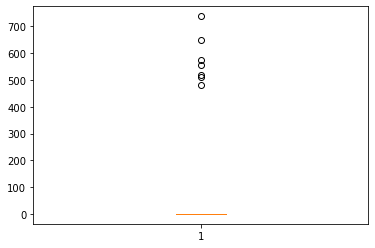

In [10]:
plt.boxplot(house['PoolArea'])
Q1 = house['PoolArea'].quantile(0.1)
Q3 = house['PoolArea'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['PoolArea'] >= Q1 - 1.5*IQR) & 
                      (house['PoolArea'] <= Q3 + 1.5*IQR)]
house.shape

(1402, 81)

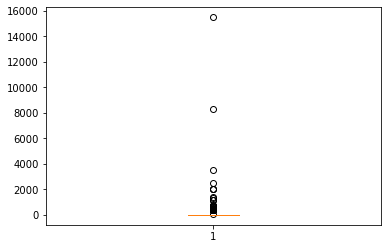

In [11]:
plt.boxplot(house['MiscVal'])
Q1 = house['MiscVal'].quantile(0.1)
Q3 = house['MiscVal'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['MiscVal'] >= Q1 - 1.5*IQR) & 
                      (house['MiscVal'] <= Q3 + 1.5*IQR)]
house.shape

(1291, 81)

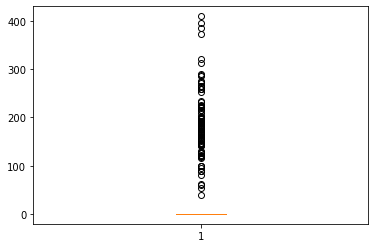

In [12]:
plt.boxplot(house['ScreenPorch'])
Q1 = house['ScreenPorch'].quantile(0.1)
Q3 = house['ScreenPorch'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['ScreenPorch'] >= Q1 - 1.5*IQR) & 
                      (house['ScreenPorch'] <= Q3 + 1.5*IQR)]
house.shape

(1274, 81)

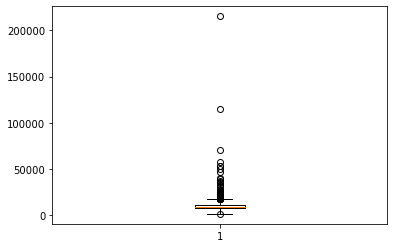

In [13]:
plt.boxplot(house['LotArea'])
Q1 = house['LotArea'].quantile(0.1)
Q3 = house['LotArea'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['LotArea'] >= Q1 - 1.5*IQR) & 
                      (house['LotArea'] <= Q3 + 1.5*IQR)]
house.shape

(1255, 81)

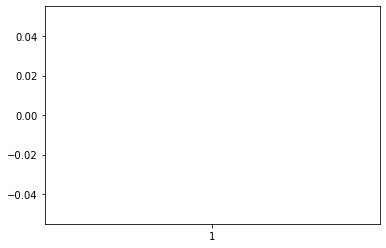

In [14]:
plt.boxplot(house['MasVnrArea'])
Q1 = house['MasVnrArea'].quantile(0.1)
Q3 = house['MasVnrArea'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['MasVnrArea'] >= Q1 - 1.5*IQR) & 
                      (house['MasVnrArea'] <= Q3 + 1.5*IQR)]
house.shape

(1253, 81)

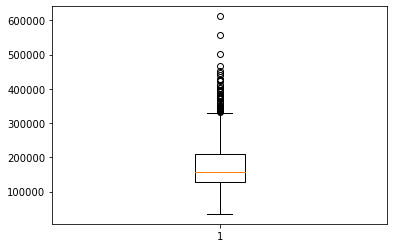

In [15]:
plt.boxplot(house['SalePrice'])
Q1 = house['SalePrice'].quantile(0.1)
Q3 = house['SalePrice'].quantile(0.9)
IQR = Q3 - Q1
house = house[(house['SalePrice'] >= Q1 - 1.5*IQR) & 
                      (house['SalePrice'] <= Q3 + 1.5*IQR)]
house.shape

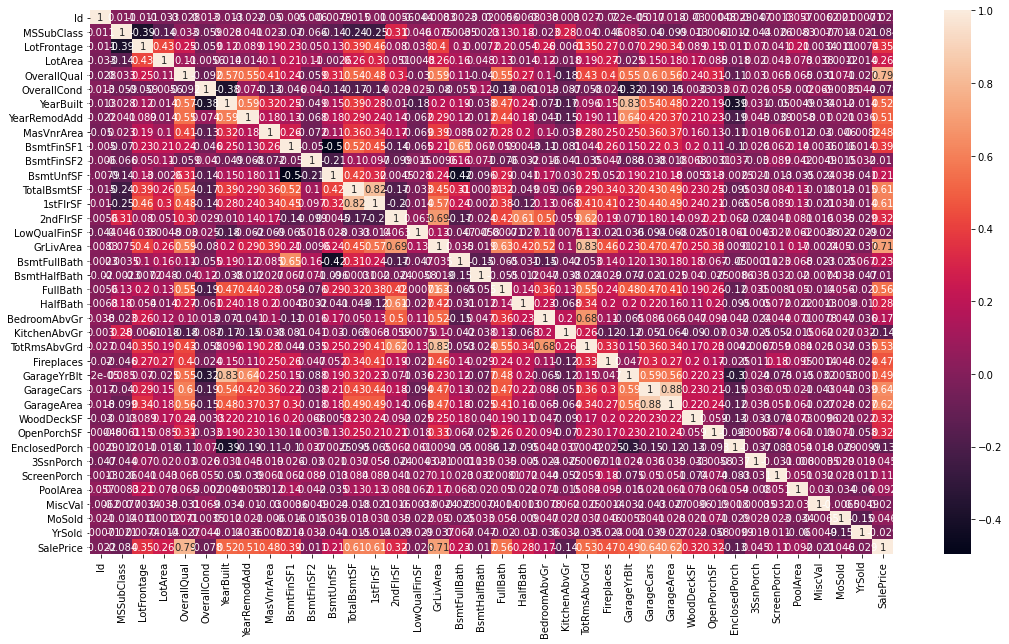

In [16]:
plt.figure(figsize=(18,10))

# heatmap
sns.heatmap(cor, annot=True)
plt.show()

## Data Cleaning

In [23]:
house.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      213
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [21]:
# Checking the percentage of missing values
round(100*(house.isnull().sum()/len(house.index)), 2)

Id                0.0
MSSubClass        0.0
MSZoning          0.0
LotFrontage      17.0
LotArea           0.0
                 ... 
MoSold            0.0
YrSold            0.0
SaleType          0.0
SaleCondition     0.0
SalePrice         0.0
Length: 81, dtype: float64

#### Null value treatment

In [24]:
house.shape

(1253, 81)

In [25]:
#NA in Alley column means No Alley, so we will replace NA by it.
house['Alley'].fillna('No Alley', inplace=True)

In [26]:
house['MasVnrType'].fillna('None', inplace=True) 

In [27]:
#NA in FireplaceQu column means No Fireplace, so we will replace NA by it.
house['FireplaceQu'].fillna('No Fireplace', inplace=True)

In [28]:
#NA in PoolQC column means No Pool, so we will replace NA by it.
house['PoolQC'].fillna('No Pool', inplace=True)

In [29]:
#NA in Fence column means No Fence, so we will replace NA by it.
house['Fence'].fillna('No Fence', inplace=True) 

In [30]:
house['MasVnrArea'].fillna(0, inplace=True) 

In [31]:
house['LotFrontage'].fillna(0, inplace=True) 

In [32]:
#NA in GarageType, GarageFinish, GarageQual, GarageCond columns mean No Garage, so we will replace NA by it.

house['GarageType'].fillna('No Garage', inplace=True) 
house['GarageFinish'].fillna('No Garage', inplace=True) 
house['GarageQual'].fillna('No Garage', inplace=True) 
house['GarageCond'].fillna('No Garage', inplace=True)

In [33]:
# MiscFeature column has almost 99% null values so we will drop it
house= house.drop('MiscFeature', axis=1)

In [35]:
house.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64


In [36]:
#converting year to number of years
house['YearBuilt'] = 2021 - house['YearBuilt']
house['YearRemodAdd'] = 2021 - house['YearRemodAdd']
house['GarageYrBlt'] = 2021 - house['GarageYrBlt']
house['YrSold'] = 2021 - house['YrSold']

In [37]:
house['MSSubClass'] = house['MSSubClass'].astype('object')
house['OverallQual'] = house['OverallQual'].astype('object')
house['OverallCond'] = house['OverallCond'].astype('object')
house['BsmtFullBath'] = house['BsmtFullBath'].astype('object')
house['BsmtHalfBath'] = house['BsmtHalfBath'].astype('object')
house['FullBath'] = house['FullBath'].astype('object')
house['HalfBath'] = house['HalfBath'].astype('object')
house['BedroomAbvGr'] = house['BedroomAbvGr'].astype('object')
house['KitchenAbvGr'] = house['KitchenAbvGr'].astype('object')
house['TotRmsAbvGrd'] = house['TotRmsAbvGrd'].astype('object')
house['Fireplaces'] = house['Fireplaces'].astype('object')
house['GarageCars'] = house['GarageCars'].astype('object')

In [39]:
house.shape

(1253, 80)

In [41]:
final = house

In [45]:
final['Utilities'].value_counts()

AllPub    1253
Name: Utilities, dtype: int64

#### Dummy Variables

In [44]:

varlist1 =  ['Street']

# Defining the map function
def binary_map(x):
    return x.map({'Pave': 1, "Grvl": 0})

# Applying the function to the Lead list
final[varlist1] = final[varlist1].apply(binary_map)

In [46]:
varlist2 =  ['Utilities']

# Defining the map function
def binary_map(x):
    return x.map({'AllPub': 1, "NoSeWa": 0})

# Applying the function to the Lead list
final[varlist2] = final[varlist2].apply(binary_map)

In [47]:
varlist3 =  ['CentralAir']

# Defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function to the Lead list
final[varlist3] = final[varlist3].apply(binary_map)

### Data Preparation

In [48]:
X = final.drop([ 'Id'], axis=1)

In [49]:
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()

,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,60,RL,No Alley,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
1,20,RL,No Alley,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
2,60,RL,No Alley,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
3,70,RL,No Alley,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,Unf,3,TA,TA,Y,No Pool,No Fence,WD,Abnorml
4,60,RL,No Alley,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,RFn,3,TA,TA,Y,No Pool,No Fence,WD,Normal


In [50]:
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [51]:
final = final.drop(list(house_categorical.columns), axis=1)

In [52]:
final = pd.concat([final, house_dummies], axis=1)

In [54]:
final.shape

(1253, 300)

In [55]:
X = final
y = np.log(X.SalePrice)
X = X.drop("SalePrice",1)

In [56]:
X = X.fillna(X.interpolate())

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### Model Building and Evaluation

#### Ridge Regression

In [59]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [60]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 4.0}
-0.07490031919810537


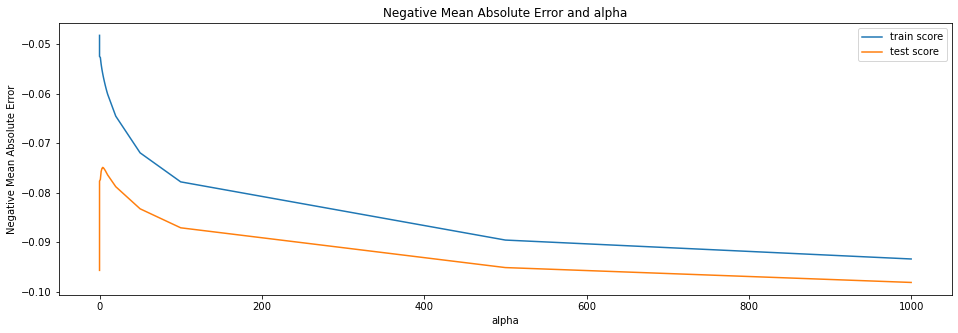

In [62]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [63]:
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.08442335e-05, -1.29476419e-04,  8.64982823e-06, -2.08529167e-02,
        0.00000000e+00, -2.80940988e-03, -1.17578887e-03,  2.14798318e-05,
        5.95430690e-05,  6.69135840e-05, -2.28352017e-05,  1.03621447e-04,
        3.77558156e-02,  7.70920942e-05,  1.14943388e-04, -8.32109180e-06,
        1.83714362e-04,  5.25783543e-04,  1.35751439e-04,  1.18398461e-04,
        2.24007508e-04,  1.19009185e-04,  2.24073414e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.06780542e-04,  3.26827206e-04,
       -1.15084205e-02,  9.11182461e-03,  2.20253648e-02,  5.56730762e-03,
       -3.99914159e-02,  4.85513943e-02,  2.26983416e-02, -2.19904813e-02,
       -1.56052054e-02, -1.72139518e-02,  2.21571433e-02, -6.66657945e-02,
       -1.65480922e-02,  5.31897676e-03,  6.97223400e-02,  1.14903888e-02,
        2.89003386e-02,  3.36333979e-03,  2.09400529e-02,  3.67571188e-02,
       -1.14787413e-02, -4.86678885e-02,  5.43167310e-03,  1.61830186e-02,
       -2.83398590e-02,  

In [64]:
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9543534179988408


### Lasso

In [65]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [66]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.281498,0.182269,0.006251,0.007656,0.0001,{'alpha': 0.0001},-0.084353,-0.075172,-0.080517,-0.080684,...,-0.076307,0.008282,1,-0.051724,-0.052959,-0.052804,-0.052213,-0.057217,-0.053384,0.001967
1,0.028125,0.006249,0.003124,0.006248,0.001,{'alpha': 0.001},-0.083513,-0.082241,-0.086239,-0.081683,...,-0.080028,0.006962,2,-0.066716,-0.067696,-0.065153,-0.068256,-0.070302,-0.067624,0.001703
2,0.015624,0.000002,0.009375,0.007655,0.01,{'alpha': 0.01},-0.102980,-0.103797,-0.107636,-0.104642,...,-0.101069,0.007555,3,-0.096992,-0.096701,-0.095088,-0.097794,-0.101147,-0.097544,0.002004
3,0.065620,0.006249,0.012503,0.006251,0.05,{'alpha': 0.05},-0.104493,-0.107558,-0.110196,-0.107669,...,-0.103796,0.007584,6,-0.100418,-0.099105,-0.097898,-0.100149,-0.104158,-0.100346,0.002103
4,0.049995,0.006250,0.006251,0.007656,0.1,{'alpha': 0.1},-0.103231,-0.107880,-0.110775,-0.107862,...,-0.103777,0.007708,5,-0.100783,-0.099208,-0.098105,-0.100243,-0.104449,-0.100558,0.002151


In [67]:
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv1.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

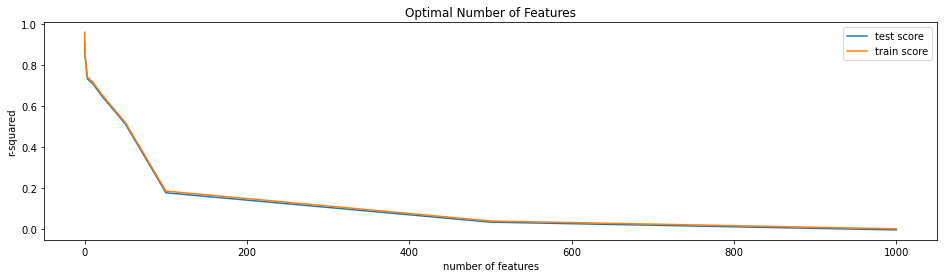

In [68]:
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
plt.figure(figsize=(16,4))

plt.plot(cv_results1["param_alpha"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_alpha"], cv_results1["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [69]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0001}
-0.07630744921613344


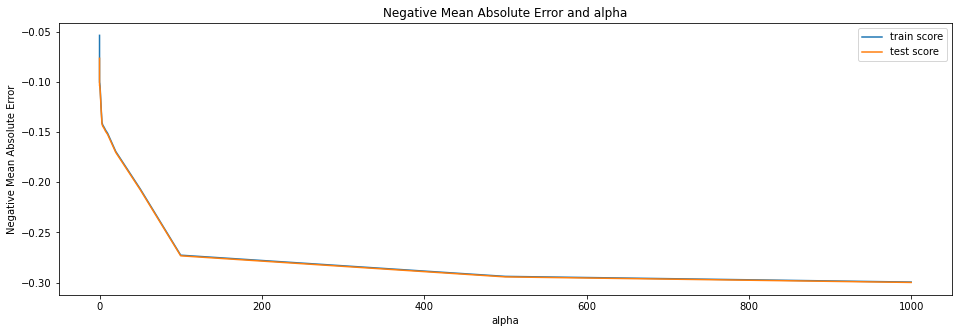

In [70]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

from the above graph and the bestparam score we got optimum lambda to be 0.0001

In [71]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [72]:
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9575119031855726


In [73]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [75]:
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8818744660675768


In [76]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.02002191846461918


## Linear Regression

In [77]:
model = LinearRegression()

In [78]:
model.fit(X_train, y_train)

LinearRegression()

In [79]:
y_test_pred1 = model.predict(X_test)

In [80]:
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred1))

0.8610428763788933
